In [1]:
import numpy as np
import pandas as pd

# For Drawing curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt

# For Record Keeping
from datetime import datetime
date = datetime.today().strftime('%m%d%y')  # For labelling purposes


In [15]:
len(svmRBF)


3144

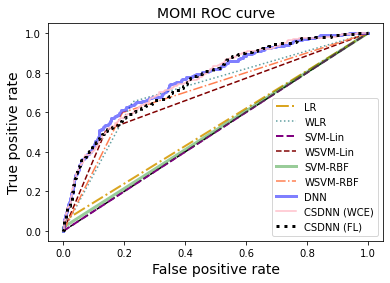

In [2]:
data='MOMI'

logpred = np.load('Predictions/'+data+ '/log_pred.npy')
logWeight = np.load('Predictions/'+data+ '/logWeight_pred.npy')

svmLin = np.load('Predictions/'+data+ '/svmLin_pred.npy')
svmLinWeight = np.load('Predictions/'+data+ '/svmLinWeight_pred.npy')

svmRBF = np.load('Predictions/'+data+ '/svmRBF_pred.npy')
svmRBFWeight = np.load('Predictions/'+data+ '/svmRBFWeight_pred.npy')



nn = np.load('Predictions/' + data + '/nn_pred_CE.npy')
nnWeight = np.load('Predictions/' + data + '/nn_pred_WCE.npy')
nnFL = np.load('Predictions/' + data + '/nn_pred_FL.npy')

"""
nnBB = np.load('Predictions/' + data + '/nn_pred_CE_BB.npy')
nnWeightBB = np.load('Predictions/' + data + '/nn_pred_WCE_BB.npy')
nnFLBB = np.load('Predictions/' + data + '/nn_pred_FL_BB.npy')
"""

predictions = {"LR": logpred,
               "WLR": logWeight,
               "SVM-Lin": svmLin,
               "WSVM-Lin": svmLinWeight,
               "SVM-RBF": svmRBF,
               "WSVM-RBF": svmRBFWeight,
               "DNN": nn,
               "CSDNN (WCE)": nnWeight,
               "CSDNN (FL)": nnFL}
               #"DNN-BB": nnBB,
               #"CSDNN (WCE-BB)": nnWeightBB,
               #"CSDNN (FL-BB)": nnFLBB}

filename = 'Data/'+ data + '/070121_Y_Test.csv'

Y_test = pd.read_csv(filename).to_numpy().ravel()




# A dictionary that will hold the false positve, true positive, and threshold rate for each model
params = {}

linestyle = [':','-','']

for model, predictions in predictions.items():
    fpr, tpr, thresholds = roc_curve(Y_test, predictions)
    auc_ = auc(fpr, tpr)

    params[model] = {"tpr": tpr,
                     "fpr": fpr,
                     "thresholds": thresholds,
                     "auc": auc_}


plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')


"""
for model in self.params.keys():
    plt.plot(self.params[model]["fpr"], self.params[model]["tpr"], label=model)
"""


plt.plot(params["LR"]["fpr"],params["LR"]["tpr"], label="LR", linestyle='-.', color='goldenrod', linewidth=2)
plt.plot(params["WLR"]["fpr"], params["WLR"]["tpr"], label="WLR", linestyle=':', color='cadetblue')
plt.plot(params["SVM-Lin"]["fpr"], params["SVM-Lin"]["tpr"], label="SVM-Lin", linestyle='--', color='purple', linewidth=2)
plt.plot(params["WSVM-Lin"]["fpr"], params["WSVM-Lin"]["tpr"], label="WSVM-Lin", linestyle='--', color='maroon')
plt.plot(params["SVM-RBF"]["fpr"], params["SVM-RBF"]["tpr"], label="SVM-RBF", linestyle='solid', color='green', alpha=0.4, linewidth=3)
plt.plot(params["WSVM-RBF"]["fpr"], params["WSVM-RBF"]["tpr"], label="WSVM-RBF", linestyle='-.', color='coral')
plt.plot(params["DNN"]["fpr"], params["DNN"]["tpr"], label="DNN", linestyle='solid', alpha=0.5, color='blue', linewidth=3)
plt.plot(params["CSDNN (WCE)"]["fpr"], params["CSDNN (WCE)"]["tpr"], label="CSDNN (WCE)", color='pink')
plt.plot(params["CSDNN (FL)"]["fpr"], params["CSDNN (FL)"]["tpr"], label="CSDNN (FL)", linestyle=':', color='black',linewidth=3)

plt.xlabel('False positive rate', fontsize=14)
plt.ylabel('True positive rate', fontsize=14)
plt.title(data + ' ROC curve', fontsize=14)
plt.legend(loc='lower right')
plt.savefig('Graphs/' + data + "_ROC_Curve_" + date, bbox_inches="tight")
plt.show()


In [9]:
#predictions["LR"]

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

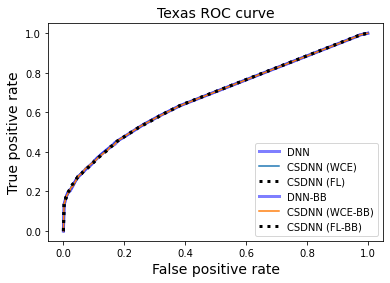

In [18]:
plt.plot(params["DNN"]["fpr"], params["DNN"]["tpr"], label="DNN", linestyle='solid', alpha=0.5, color='blue', linewidth=3)
plt.plot(params["CSDNN (WCE)"]["fpr"], params["CSDNN (WCE)"]["tpr"], label="CSDNN (WCE)")
plt.plot(params["CSDNN (FL)"]["fpr"], params["CSDNN (FL)"]["tpr"], label="CSDNN (FL)", linestyle=':', color='black',linewidth=3)
plt.plot(params["DNN-BB"]["fpr"], params["DNN-BB"]["tpr"], label="DNN-BB", linestyle='solid', alpha=0.5, color='blue', linewidth=3)
plt.plot(params["CSDNN (WCE-BB)"]["fpr"], params["CSDNN (WCE-BB)"]["tpr"], label="CSDNN (WCE-BB)")
plt.plot(params["CSDNN (FL-BB)"]["fpr"], params["CSDNN (FL-BB)"]["tpr"], label="CSDNN (FL-BB)", linestyle=':', color='black',linewidth=3)


plt.xlabel('False positive rate', fontsize=14)
plt.ylabel('True positive rate', fontsize=14)
plt.title(data + ' ROC curve', fontsize=14)
plt.legend(loc='lower right')